In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [14]:
train_dir = 'datasets/art/training_set'
test_dir = 'datasets/art/validation_set'

print(os.listdir(train_dir))
print(os.listdir(test_dir))

['sculpture', 'iconography', '.DS_Store', 'engraving', 'drawings', 'painting']
['sculpture', 'iconography', '.DS_Store', 'engraving', 'drawings', 'painting']


SyntaxError: invalid syntax (<ipython-input-20-21b5b26bf7ba>, line 1)

In [24]:
directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

uLabels = os.listdir(train_dir)
print(uLabels)

labels = []
images = []
rLabels = []

    
def label_img(label):
    
    rLabel = np.zeros((len(uLabels), ), dtype=np.int)
    for i in range(0, len(rLabel)):
        rLabel = np.zeros((len(uLabels), ), dtype=np.int)
        rLabel[i]=1
        rLabels.append(rLabel)
    
    for i in range (0, len(rLabels)):
        print(rLabels[i], uLabels[i])
        if label == uLabels[i]:
            return rLabels[i]


for d in directories:
    label_directory = os.path.join(train_dir, d)
    if not os.listdir(label_directory):
        uLabels.remove(d)
        continue
    
    file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory) if f.endswith('jpg' or 'jpeg')]
    
    for f in file_names:
        if os.path.getsize(f) > 0:
            try:
                img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (50, 50))
                images.append(img)
                labels.append(label_img(d))
            except Exception as e:
                pass
print(uLabels)      

['sculpture', 'iconography', '.DS_Store', 'engraving', 'drawings', 'painting']
['sculpture', 'iconography', 'engraving', 'drawings', 'painting']


In [41]:
rLabel = np.zeros((len(uLabels), ), dtype=np.int)
rLabels = []
print(rLabel)
for i in range(0, len(rLabel)):
    rLabel = np.zeros((len(uLabels), ), dtype=np.int)
    rLabel[i]=1
    rLabels.append(rLabel)

for i in range (0, len(rLabels)):
    print(rLabels[i], uLabels[i])

[0 0 0 0 0]
[1 0 0 0 0] sculpture
[0 1 0 0 0] iconography
[0 0 1 0 0] engraving
[0 0 0 1 0] drawings
[0 0 0 0 1] painting


In [27]:
images = np.array(images)
labels = np.array(labels)

print(images[1].shape)
print(images.shape)

print(labels[1].shape)
print(labels.shape)

len(images)

(50, 50)
(3331, 50, 50)
(5,)
(3331, 5)


3331

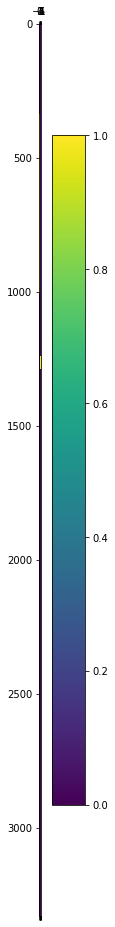

In [28]:
plt.matshow(labels)
plt.colorbar()
plt.show()

In [29]:
print(images.ndim)
print(images.size)
print(images.itemsize)
print(images.flags)
print(images.nbytes)
print(labels.ndim)
print(labels.size)

3
8327500
1
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
8327500
2
16655


In [30]:
rand_images = np.random.randint(images.size, size=20)

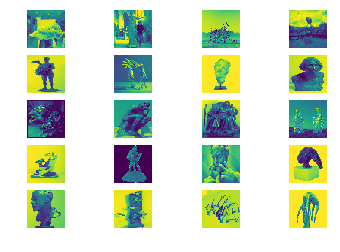

In [31]:
for i in range(len(rand_images)):
    plt.subplot(5,4,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.show

In [32]:
directories = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

labels_test = []
images_test = []

for d in directories:
    label_directory = os.path.join(test_dir, d)
    file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory) if f.endswith('jpg' or 'jpeg')]
    
    for f in file_names:
        if os.path.getsize(f) > 0:
            try:
                img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (50, 50))
                images_test.append(img)
                labels_test.append(label_img(d))
            except Exception as e:
                pass

In [33]:
images_test = np.array(images_test)
labels_test = np.array(labels_test)

In [34]:
print(images_test.size)
print(labels_test.size)

880000
1760


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


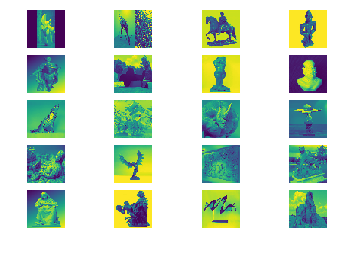

In [35]:
rand_images = np.random.randint(images_test.size, size=20)
for i in range(len(rand_images)):
    plt.subplot(5,4,i+1)
    plt.imshow(images_test[i])
    plt.axis('off')
    plt.xlabel(labels_test[i])
    plt.show

In [36]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [37]:
convnet = input_data(shape=[None, 50, 50, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 256, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 5, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=1e-3, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [15]:
X = np.array([i for i in images]).reshape(-1, 50, 50, 1)
Y = [i for i in labels]

test_x = np.array([i for i in images_test]).reshape(-1, 50, 50, 1)
test_y = [i for i in labels_test]

In [16]:
print(X.shape)
print(Y[0].shape)
print(test_x.shape)
print(len(test_y))

(3331, 50, 50, 1)
(5,)
(352, 50, 50, 1)
352


In [36]:
test_y[10][1]

0

In [17]:
model.fit({'input': X}, {'targets': Y}, n_epoch=50, validation_set=({'input': test_x}, {'targets': test_y}),
    snapshot_epoch=True, show_metric=True, run_id='Run3')

Training Step: 2649  | total loss: 0.05519 | time: 7.866s
| Adam | epoch: 050 | loss: 0.05519 - acc: 0.9878 -- iter: 3328/3331
Training Step: 2650  | total loss: 0.05158 | time: 9.023s
| Adam | epoch: 050 | loss: 0.05158 - acc: 0.9890 | val_loss: 0.83516 - val_acc: 0.8182 -- iter: 3331/3331
--


In [38]:
#model.save('run191250')
model.load('run191250')

INFO:tensorflow:Restoring parameters from /Users/manas/Documents/Work/Python/Workspace/ipynb/run191250


In [39]:
check_dir = 'datasets/art/CheckResults/training_set'

In [54]:
directories = [d for d in os.listdir(check_dir) if os.path.isdir(os.path.join(check_dir, d))]
directories = ['iconography']
imagesCheck = []
labelsCheck = []

def label_img(label):

    if label=='sculpture':
        return [1,0,0,0,0]
    elif label=='iconography':
        return [0,1,0,0,0]
    elif label=='engraving':
        return [0,0,1,0,0]
    elif label=='drawings':
        return [0,0,0,1,0]
    elif label=='painting':
        return [0,0,0,0,1]

for d in directories:
    #label_directory = os.path.join(check_dir, d)
    label_directory = os.path.join(check_dir, d)
    file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory) if f.endswith('jpg' or 'jpeg')]
    
    for f in file_names:
        if os.path.getsize(f) > 0:
            try:
                img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (50, 50))
                imagesCheck.append(img)
                labelsCheck.append(label_img(d))
            except Exception as e:
                pass
        

In [55]:
imagesCheck = np.array(imagesCheck)
print(imagesCheck.shape)

(649, 50, 50)


1622500
[[5.1894344e-06 9.9390972e-01 2.1551661e-03 4.4160683e-04 3.4882873e-03]]


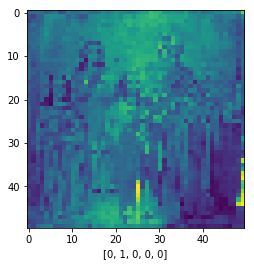

In [58]:
#imagesCheck = np.array(imagesCheck)
imgs = []
print(imagesCheck.size)
i=412
img = imagesCheck[i]
#for img in imagesCheck:
plt.subplot(1,1,1)
plt.imshow(img)
plt.xlabel(labelsCheck[i])
img = img.reshape(-1, 50,50,1)
out = model.predict(img)
print(out)
    
#print(imgs.size)
classes = ['sculpture', 'iconography', 'engraving', 'drawings', 'painting']

In [59]:
np.argmax(out)

1

In [43]:
plt.figure(figsize=(10,10))
rand_images = np.random.randint(imagesCheck.size, size=1)
print(rand_images)
for i in range(len(rand_images)):
    out = model.predict(imgs[i])
    print(out)
    plt.subplot(5,4,i+1)
    plt.imshow(imagesCheck[i])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelsCheck[i])
    plt.show

[596595]


IndexError: list index out of range

<Figure size 720x720 with 0 Axes>